In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage import color, feature
from numpy.random import randint

def Green(x,y):
    f = len(x)
    A = 0
    for i in range(f):
        if i != f-1:
            A_temp = x[i]*y[i+1] - y[i]*x[i+1]
        else:
            A_temp = x[i]*y[0] - y[i]*x[0]
        A += A_temp
    A /= 2
    return A

N = 501
n = N//2

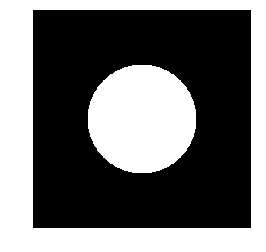

In [2]:
#circle
r = N//4

circle = np.zeros([N,N])
A_circle = 0
for x in range(N):
    for y in range(N):
        if (x-n)**2 + (y-n)**2 <= r**2:
            circle[x,y] = 1
            A_circle += 1

plt.axis('off')
plt.imshow(circle, cmap = 'gray')
# plt.imsave('circle.png',circle, cmap = 'gray')

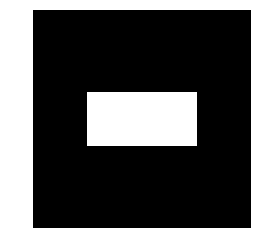

In [3]:
#rectangle
l = N//4
w = N//2

rectangle = np.zeros([N,N])
A_rectangle = 0
for x in range(N):
    for y in range(N):
        if (n - w/2) <= x <= (n + w/2) and (n - l/2) <= y <= (n + l/2):
            rectangle[y,x] = 1
            A_rectangle += 1
plt.axis('off')
plt.imshow(rectangle, cmap = 'gray')
# plt.imsave('rectangle.png',rectangle, cmap = 'gray')

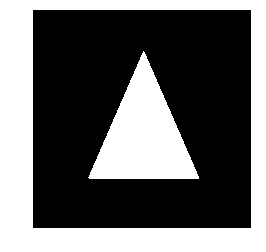

In [4]:
#triangle
triangle = plt.imread('triangle.png')
triangle = color.rgb2gray(triangle)
A_triangle = 0
for x in range(N):
    for y in range(N):
        if triangle[y,x] != 1 and triangle[y,x] != 0:
            triangle[y,x] = 1
            A_triangle += 1
        
plt.axis('off')
plt.imshow(triangle, cmap = 'gray')

In [5]:
def contour_sort(shape):
    #get shape's edge
    edge_shape = feature.canny(shape,sigma = 3)
    edge_x, edge_y = np.where(edge_shape == [1])
    
    #determine centroid
    i_temp, j_temp, pts = 0,0,0
    for j in range(shape.shape[0]):
        for i in range(shape.shape[1]):
            if shape[j,i] == 1:
                i_temp += i
                j_temp += j
                pts += 1
    n = np.array([i_temp,j_temp])/pts
    
    #shift all points wrt centroid as origin
#     edge_x = edge_x - n*np.ones(len(edge_x))
#     edge_y = edge_y - n*np.ones(len(edge_y))
    edge_x = edge_x - n[0]*np.ones(len(edge_x))
    edge_y = edge_y - n[1]*np.ones(len(edge_y))
    
    edge_x, edge_y = list(edge_x), list(edge_y)
    
    #making r and theta
    r_temp, theta_temp = [],[]
    for i in range(len(edge_x)):
        r_temp.append(np.sqrt(edge_x[i]**2 + edge_y[i]**2))

        #compensating arctan due to limited range
        if edge_y[i]>=0 and edge_x[i]>=0:
            theta_temp.append(np.arctan(edge_y[i]/edge_x[i]))
        elif edge_y[i]>=0 and edge_x[i]<0:
            theta_temp.append(np.pi + np.arctan(edge_y[i]/edge_x[i]))
        elif edge_y[i]<0 and edge_x[i]<0:
            theta_temp.append(np.pi + np.arctan(edge_y[i]/edge_x[i]))
        elif edge_y[i]<0 and edge_x[i]>=0:
            theta_temp.append(2*np.pi + np.arctan(edge_y[i]/edge_x[i]))

    #sort x,y,r,theta using method of deletion (saves time and sanity)
    x,y,r,theta = [],[],[],[]
    for i in range(len(edge_x)):
        phi = min(theta_temp)
        i_t = theta_temp.index(phi)
        theta.append(phi)
        x.append(edge_x[i_t])
        y.append(edge_y[i_t])
        r.append(r_temp[i_t])

        edge_x.pop(i_t)
        edge_y.pop(i_t)
        r_temp.pop(i_t)
        theta_temp.pop(i_t)

    A = Green(x,y)
    return A
A_c,A_r,A_t = contour_sort(circle),contour_sort(rectangle),contour_sort(triangle)
print(A_circle, A_c)
print(A_rectangle, A_r)
print(A_triangle, A_t)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in double_scalars
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in double_scalars


49077 49064.0
31375 31312.0
38195 38073.99999999974


347947.0000000017 347970 0.006609765209159404


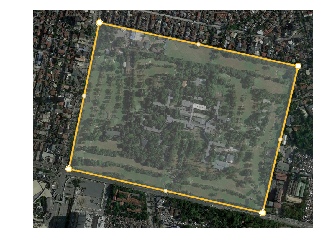

In [6]:
#Veterans Memorial Medical Center
#Perimeter = 3022.7 m, Area = 560405.55 sq.m

img_orig = plt.imread('A = 560,405.55 m², P = 3,022.7 m.PNG')
img = plt.imread('A = 560,405.55 m², P = 3,022.7 m BnW.png')
img = color.rgb2gray(img)

#Use GIMP to outline and delineate image and calculate pixel number
A_img = 0
for x in range(img.shape[1]):
    for y in range(img.shape[0]):
        if img[y,x] != 1 and img[y,x] != 0:
            img[y,x] = 1
            A_img += 1
        
plt.axis('off')
plt.imshow(img_orig)
plt.figure()
plt.axis('off')
plt.imshow(img, cmap = 'gray')

A_i = contour_sort(img)
print(A_i, A_img, abs(100*(A_i - A_img)/(A_img)))